# Graphing sEMG data and IMU data
This notebook compares the sEMG data and the motion data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

not_locked = ['time', 'pelvis_rotation', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l']

In [55]:
ik_filename = r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-18_1336\ik_generated_quat_file.mot"
semg_data_filename=r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-18_1336\semg_data.npy"

ik_data = pd.read_csv(ik_filename,sep='\t',skiprows=6)
semg_data = np.load(semg_data_filename)

Only keep joints which are not locked, and show the data

In [56]:
ik_filtered = ik_data[not_locked] 
ik_filtered.head()

,time,pelvis_rotation,lumbar_extension,lumbar_bending,lumbar_rotation,arm_flex_r,arm_add_r,arm_rot_r,elbow_flex_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.03,0.012060,1.010835,-0.461939,-0.027997,-0.476034,1.053917,0.024744,1.641499,-0.519657,0.504754,-0.036556,0.191854
2,0.07,0.025293,1.475739,-0.646641,-0.065283,-0.508900,1.561214,0.038752,2.215389,-0.711562,0.780207,-0.111753,0.139526
3,0.10,0.041774,1.973095,-0.878565,-0.123448,-0.641746,2.092420,0.048836,2.811438,-0.952840,1.041269,-0.066374,0.108898
4,0.13,0.064586,2.429666,-1.060207,-0.176286,-0.717238,2.571253,-0.040985,3.397176,-1.167887,1.286560,-0.110960,0.089882


In [57]:
(ik_filtered.max() - ik_filtered.min()).sort_values(ascending=False)

arm_flex_l          91.703811
pelvis_rotation     88.291732
arm_rot_l           87.729401
arm_add_l           81.784780
lumbar_extension    76.658623
elbow_flex_r        76.431489
arm_rot_r           69.686424
arm_add_r           63.724149
arm_flex_r          48.974799
elbow_flex_l        42.796447
lumbar_rotation     24.637727
lumbar_bending      13.067926
time                10.770000
dtype: float64

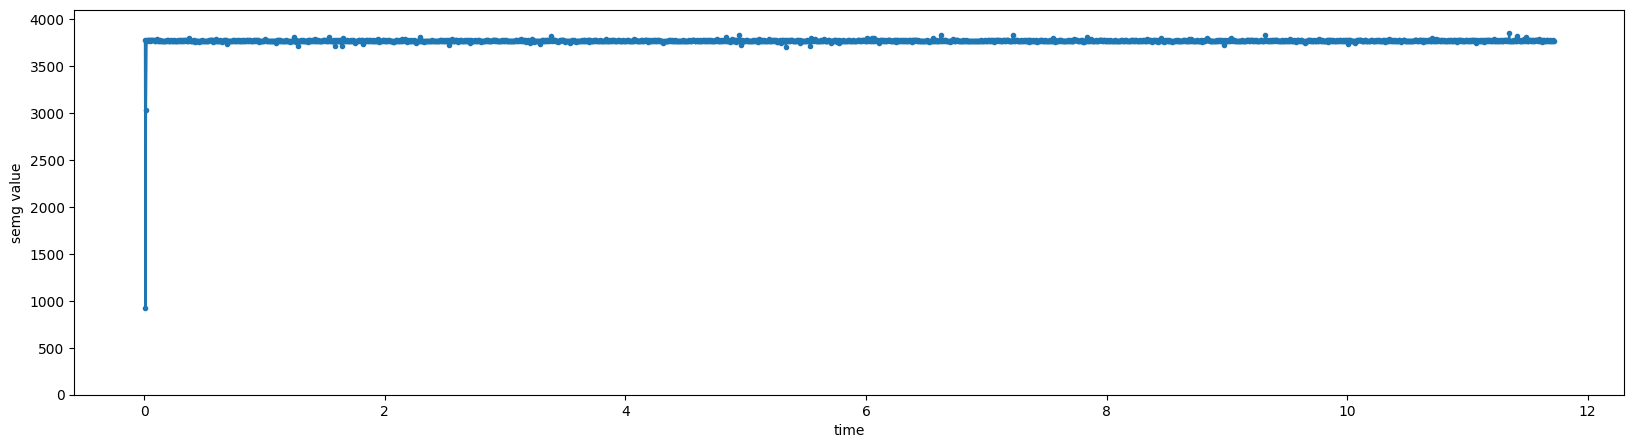

In [83]:
time_semg = semg_data[:,0]
semg_raw = semg_data[:,1]

fig,ax = plt.subplots(figsize = (20,5))
ax.plot(time_semg,semg_raw,marker = ".")

#ax.set_xlim(left = 0,right = 0.4)
ax.set_ylim(bottom=0,top = 4096)

ax.set_xlabel("time")
ax.set_ylabel("semg value")
plt.show()

In [64]:
semg_raw[:20]

array([3769.,  918., 3031., 3763., 3770., 3774., 3774., 3772., 3763.,
       3769., 3769., 3776., 3772., 3769., 3759., 3760., 3769., 3782.,
       3774., 3766.])

In [68]:
data_today = r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-18_1025\semg_data.npy"
data_yst = r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-17_1806\semg_data.npy"
data_tdy_2 = r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-18_1132\semg_data.npy"

def plot_semg(filename,timestamps = (0,0)):
    data = np.load(filename)
    fig,ax = plt.subplots(figsize = (10,2.5))
    t,s = data[:,0],data[:,1]
    ax.plot(t,s,marker = ".")
    if timestamps != (0,0):
        ax.set_xlim(left = timestamps[0],right = timestamps[1])
    
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Signal")

    plt.show()
    
    

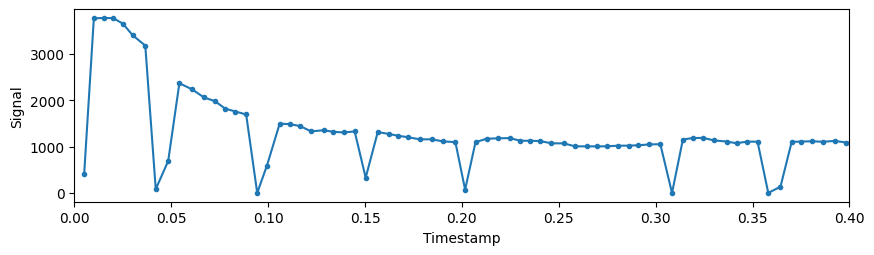

In [69]:
plot_semg(data_today,timestamps=(0,.4))

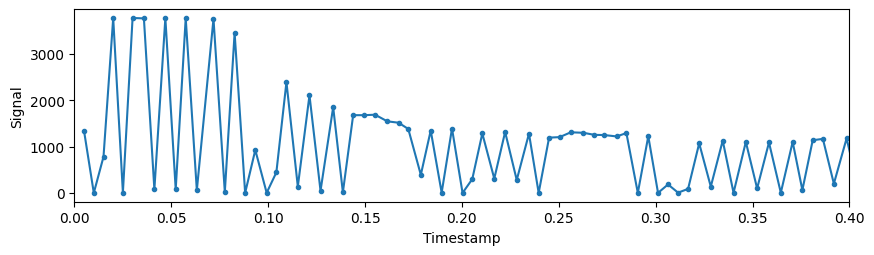

In [70]:
plot_semg(data_yst,timestamps=(0,0.4))

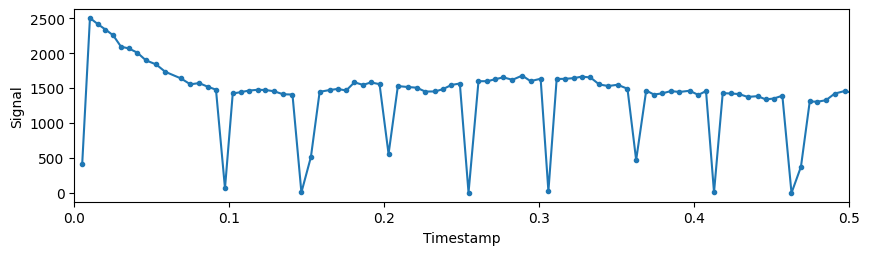

In [71]:
plot_semg(data_tdy_2,timestamps=(0,0.5))

In [72]:
data_analysis = np.load(data_tdy_2)

In [73]:
df = pd.DataFrame(data_analysis,columns = ["T","Signal"])
df.head(20)

,T,Signal
0,0.005022,411.0
1,0.010032,2505.0
2,0.015040,2418.0
3,0.020048,2339.0
4,0.025056,2256.0
5,0.030062,2094.0
6,0.035096,2069.0
7,0.040528,2009.0
8,0.046185,1898.0
9,0.052738,1840.0


In [74]:
res = []
for i in range(1,len(time_semg)):
    res.append(time_semg[i]-time_semg[i-1])

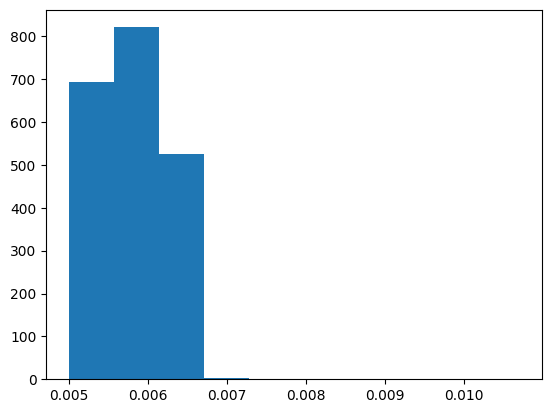

In [75]:
counts, bins = np.histogram(res)
plt.stairs(counts, bins,fill=True)
plt.show()

In [76]:
res[:5]

[0.005011796951293945,
 0.0050048828125,
 0.005001544952392578,
 0.005000114440917969,
 0.0050089359283447266]

In [80]:
np_data = np.load(data_yst)

time_semg = np_data[:,0]
semg_raw = np_data[:,1]

In [81]:
# create figure and axis objects with subplots()
def compare_semg_jointangle(joint_angle,plot_semg = True, ):

        fig,ax = plt.subplots(figsize = (20,5))
        # make a plot
        # set x-axis label
        ax.set_xlabel("time_stamp", fontsize = 14)
        # set y-axis label
        ax.set_ylabel("pelvis_rotation",color="red",fontsize=14)


        if plot_semg:
                # twin object for two different y-axis on the sample plot
                ax2=ax.twinx()
                ax2.plot(time_semg, semg_raw,color="blue")
                ax2.set_ylabel("semg_data",color="blue",fontsize=14)
                ax2.set_ylim(bottom = 0, top = 4096)
        
        #ax.set_xlim(left = 0, right = 1)

        ax.plot(ik_filtered['time'],
        ik_filtered[joint_angle],
        color="red")
                
        
        plt.title("Graph of " + joint_angle +" against time")
        plt.show()

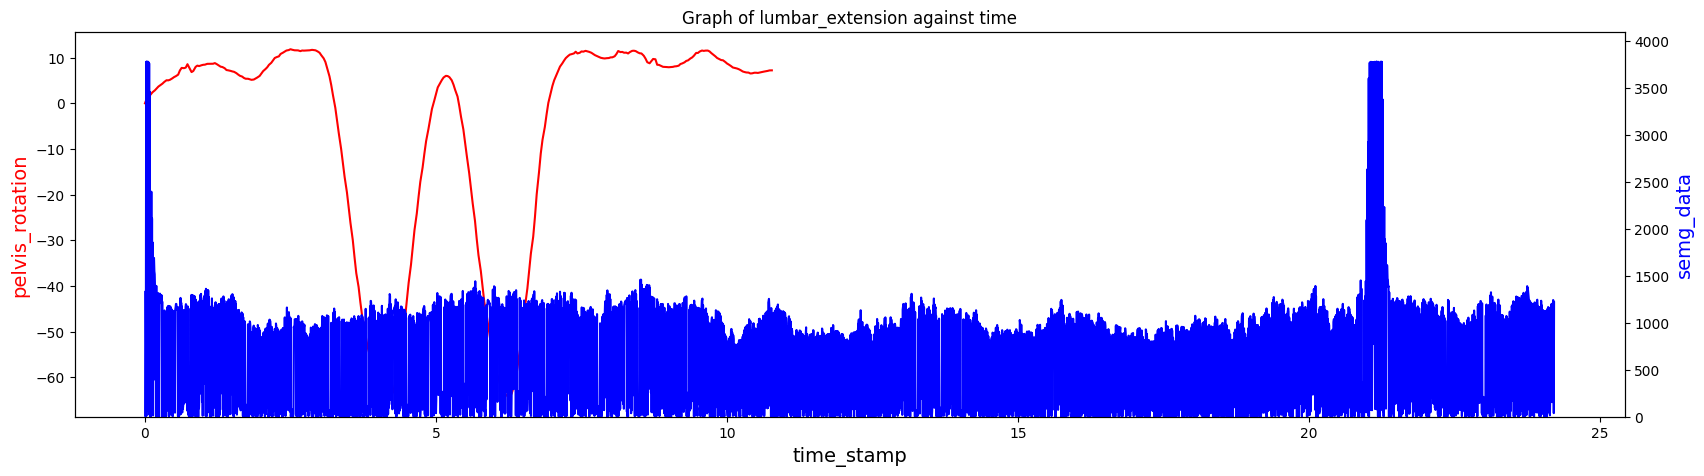

In [82]:
compare_semg_jointangle("lumbar_extension")

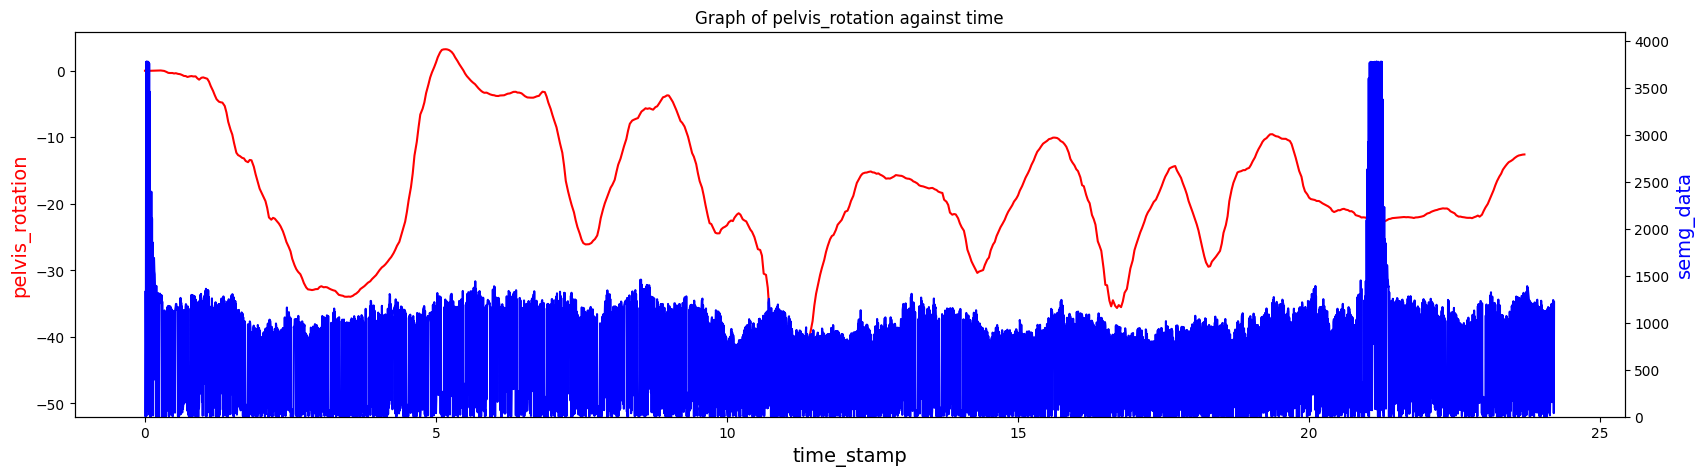

In [75]:
compare_semg_jointangle("pelvis_rotation")

In [46]:
import numpy as np
from scipy.fft import fft, fftfreq

def cal_plot_fft(semg_data,window_size,period):
    coefficients = fft(semg_data[:window_size])
    freq = fftfreq(window_size,period)

    amplitudes = np.abs(coefficients)

    freq_half = freq[:window_size//2]
    amp_half = amplitudes[:window_size//2]

    data = pd.concat([pd.Series(freq_half),pd.Series(amp_half)],axis = 1).rename(columns={0:"Freq",1:"Amp"})
    print(data.sort_values(by = ["Amp"],ascending=False).head())

    fig,ax = plt.subplots()
    ax.plot(freq_half,amp_half,marker = ".")
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    return data

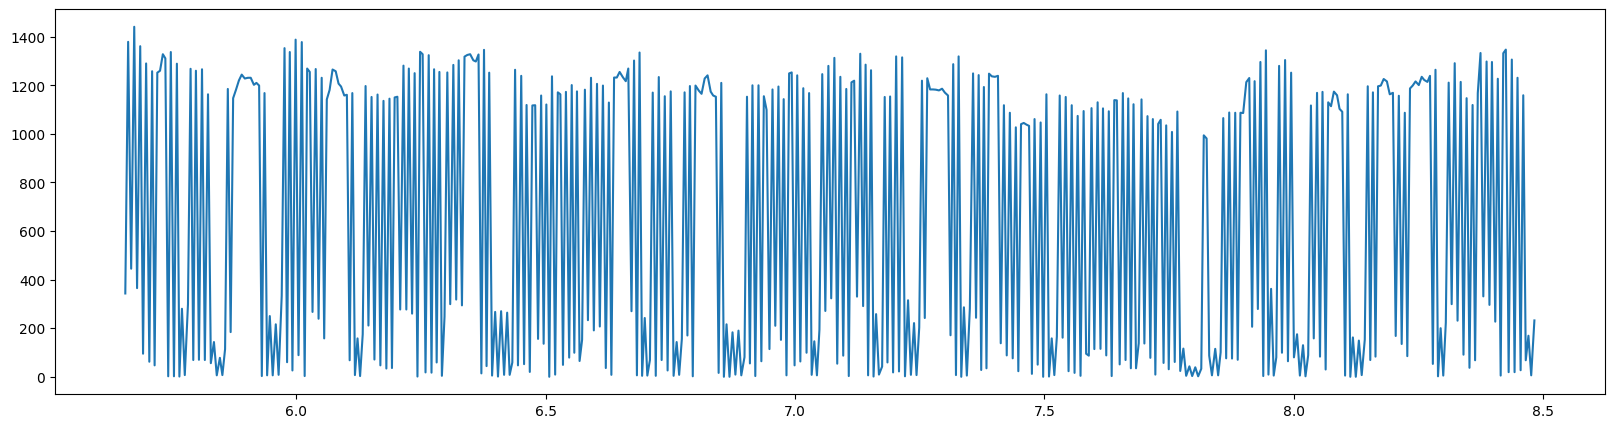

In [47]:
x = 1000
y = 1500
fig,ax = plt.subplots(figsize = (20,5))
ax.plot(time_semg[x:y],semg_raw[x:y])

         Freq            Amp
0     0.00000  172189.000000
115  89.84375   51316.830194
116  90.62500   36591.370503
10    7.81250   21382.022534
117  91.40625   20852.015263


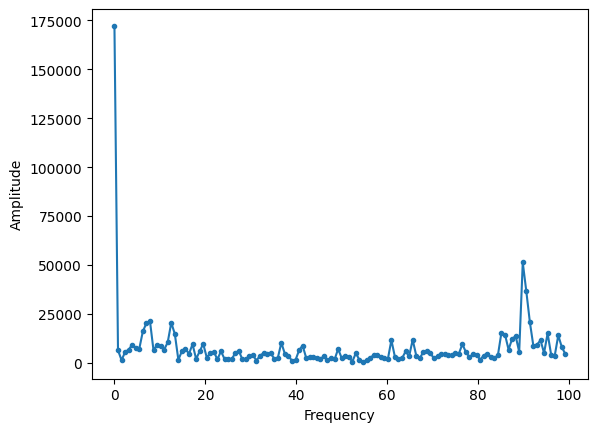

In [48]:
data = cal_plot_fft(semg_raw[1000:],256,0.005)

Text(0, 0.5, 'Frequency [Hz]')

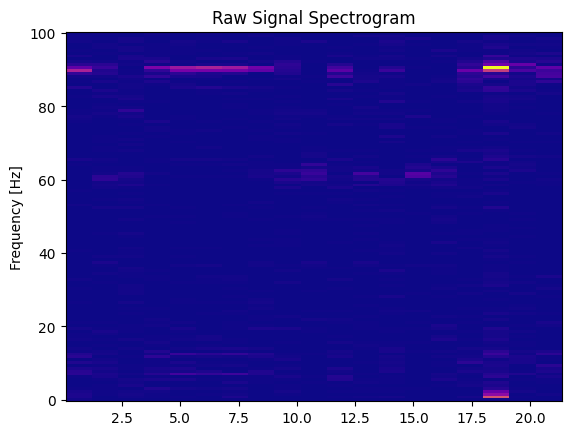

In [59]:
from scipy import signal
fs = 200 #200hz
f_raw, t_raw, Sxx_raw = signal.spectrogram(semg_raw, fs)

fig,ax= plt.subplots()

ax.pcolormesh(t_raw, f_raw, Sxx_raw,cmap="plasma")
ax.set_title("Raw Signal Spectrogram")
ax.set_ylabel('Frequency [Hz]')


<function matplotlib.pyplot.show(close=None, block=None)>

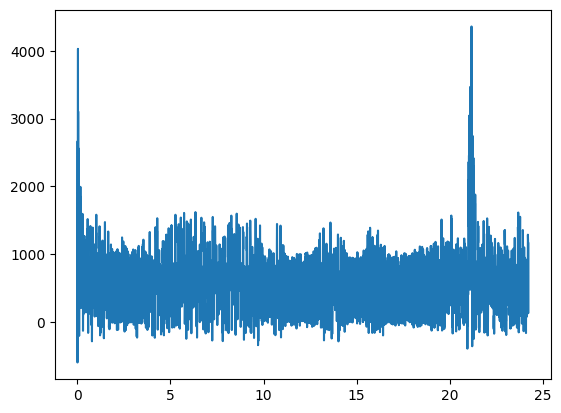

In [60]:
window_size = 128
period = 0.005

fs = 200
f0 = 90  # Interference frequency
Q = 10  # Quality factor 
w0 = f0 / (fs / 2)  # Normalized frequency

b, a = signal.iirnotch(w0, Q)  # Create filter coefficients
notch_90 = signal.filtfilt(b, a, semg_raw)

fig,ax = plt.subplots()
ax.plot(time_semg,notch_90)

plt.show


Text(0, 0.5, 'Frequency [Hz]')

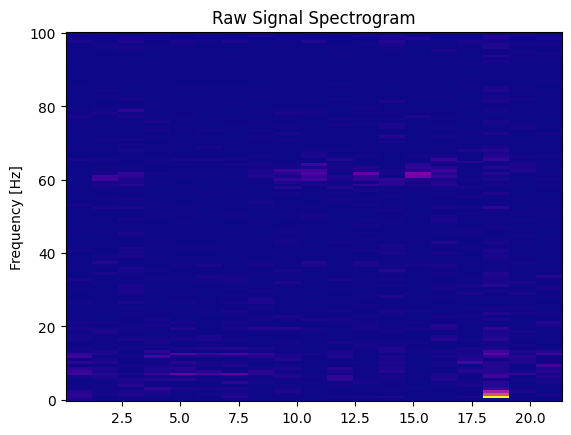

In [61]:
fs = 200 #200hz
f_n, t_n, Sxx_n = signal.spectrogram(notch_90, fs)

fig,ax= plt.subplots()

ax.pcolormesh(t_n, f_n, Sxx_n,cmap="plasma")
ax.set_title("Raw Signal Spectrogram")
ax.set_ylabel('Frequency [Hz]')

        Freq            Amp
0    0.00000  171945.444798
10   7.81250   21262.976139
16  12.50000   20419.907511
9    7.03125   20312.811360
8    6.25000   16198.456355


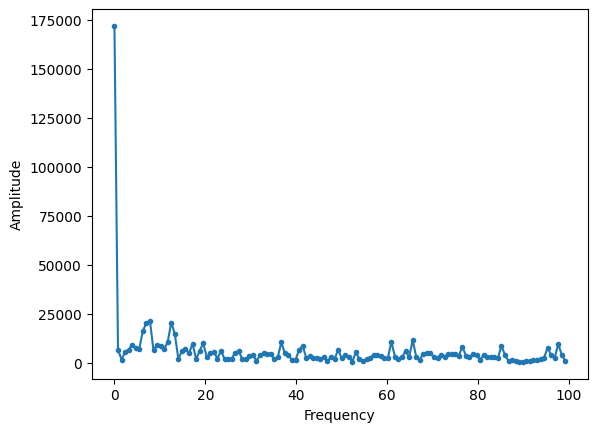

In [62]:
data = cal_plot_fft(notch_90[1000:],256,0.005)

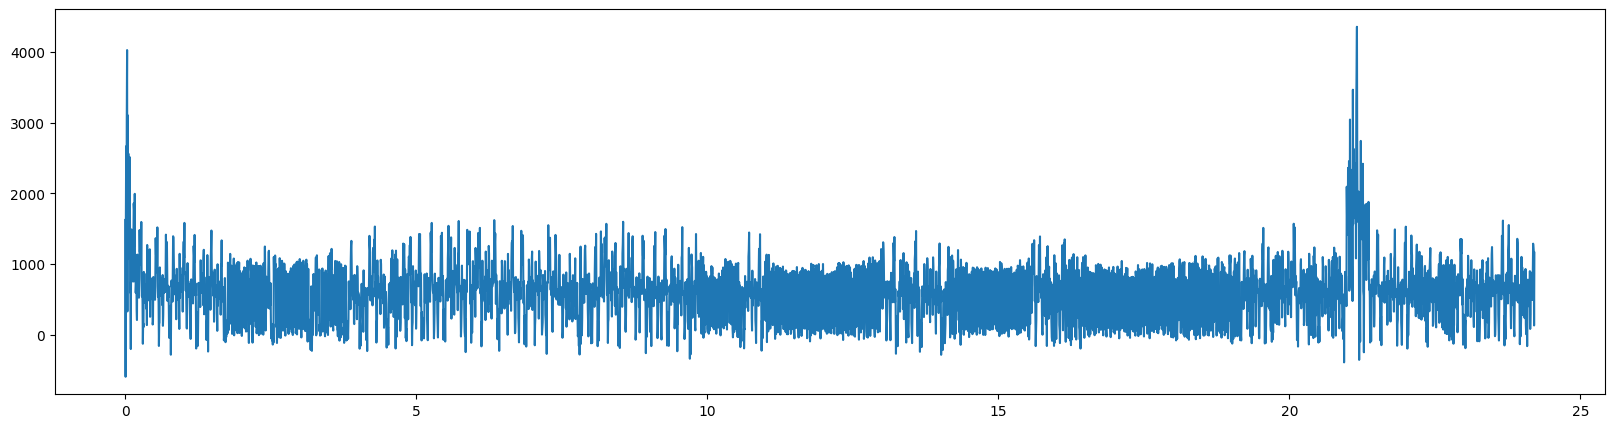

In [63]:
x = 1000
y = 1500
fig,ax = plt.subplots(figsize = (20,5))
ax.plot(time_semg,notch_90)

<function matplotlib.pyplot.show(close=None, block=None)>

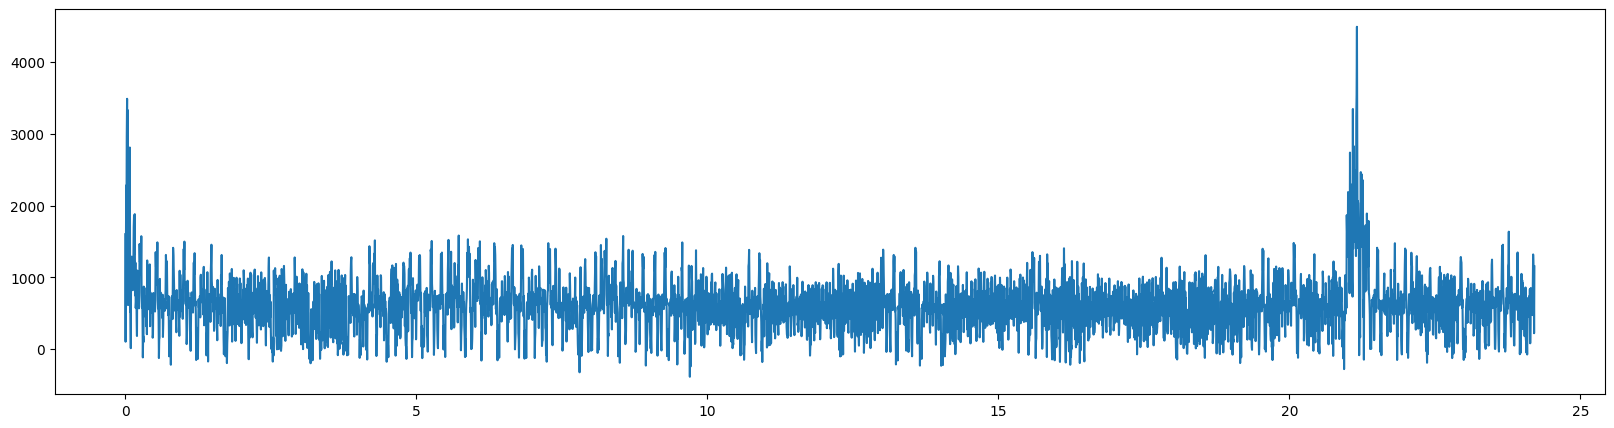

In [64]:
window_size = 128
period = 0.005

fs = 200
f0 = 60  # Interference frequency
Q = 10  # Quality factor 
w0 = f0 / (fs / 2)  # Normalized frequency

b, a = signal.iirnotch(w0, Q)  # Create filter coefficients
notch_90_60 = signal.filtfilt(b, a, notch_90)

fig,ax = plt.subplots(figsize = (20,5))
ax.plot(time_semg,notch_90_60)

plt.show